In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!apt install fonts-nanum

import matplotlib as mpl
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('/content/drive/My Drive/0910_ver2.csv', encoding = 'utf-8', index_col = 1).iloc[:,1:]
data = data.dropna()

In [ ]:
expo_df = data.groupby(['월','일','상품명']).count()['상품군']
date_list = []
name_list = []

def exposure_num(x):
    date = str(x.월)+'/'+str(x.일)
    if date not in date_list:
        date_list.append(date)
        name_list.clear()

    name_list.append(x.상품명)
    
    return name_list.count(x.상품명)/(expo_df.loc[(x.월, x.일, x.상품명)])

data['파트'] = data.apply(lambda x: exposure_num(x), axis=1)

In [ ]:
def part_(x):
    if x <= 0.5:
        return 'First'
    elif 0.5 < x < 1:
        return 'Middle'
    elif x == 1:
      return 'Later'

data['파트'] = data.파트.map(lambda x: part_(x))

In [ ]:
OE_파트 = OneHotEncoder()
m = OE_파트.fit_transform(data.파트.to_numpy().reshape(-1,1))

data['First'] =  m.toarray()[:,0]
data['Middle'] = m.toarray()[:,2]
data['Last'] = m.toarray()[:,1]

data = data.drop(columns = ['파트'])

In [ ]:
data['취급액_로그'] = np.log(data.취급액)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


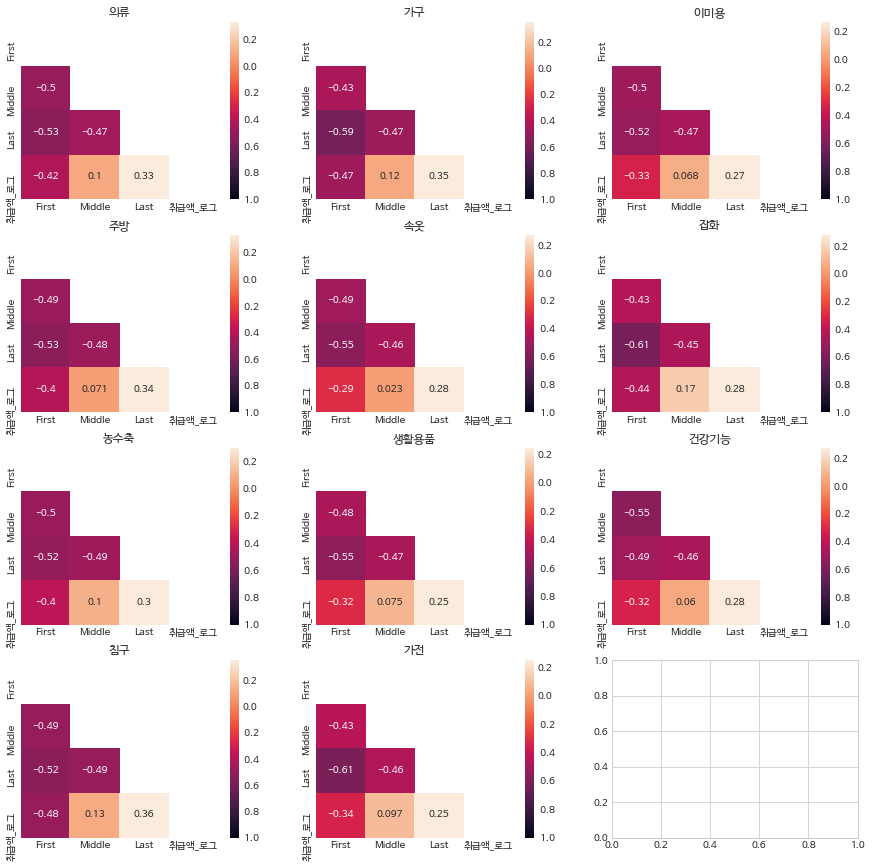

In [ ]:
fig, ax = plt.subplots(4, 3, figsize = (15,15))
for i,group  in enumerate(list(set(data.상품군))):
    df = data[data.상품군 == group]
    x = i//3
    y = i%3

    corr = df.iloc[:,-4:].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(corr, mask = mask, annot = True, ax = ax[x, y], vmin = -1)
    ax[x, y].set_title(group)